In [1]:
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
# Load the uploaded datasets
transactions_path = 'Transactions.csv'
customers_path = 'Customers.csv'
products_path = 'Products.csv'

In [3]:
transactions = pd.read_csv(transactions_path)
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)

In [4]:
# Display the first few rows of each dataset to understand their structure
transactions_head = transactions.head()
customers_head = customers.head()
products_head = products.head()

transactions_info = transactions.info()
customers_info = customers.info()
products_info = products.info()

transactions_head, customers_head, products_head, transactions_info, customers_info, products_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.fr

(  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Catego

In [6]:
# Convert necessary columns to datetime for analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

#### Detailed Analysis of Product Dataset for Business Insights

In [7]:
def split_first(col):
    col = str(col)
    return col.split()[0]

def split_second(col):
    col = str(col)
    return col.split()[1]

products['CompanyName'] = products['ProductName'].apply(split_first)
products['ProductDetail'] = products['ProductName'].apply(split_second)

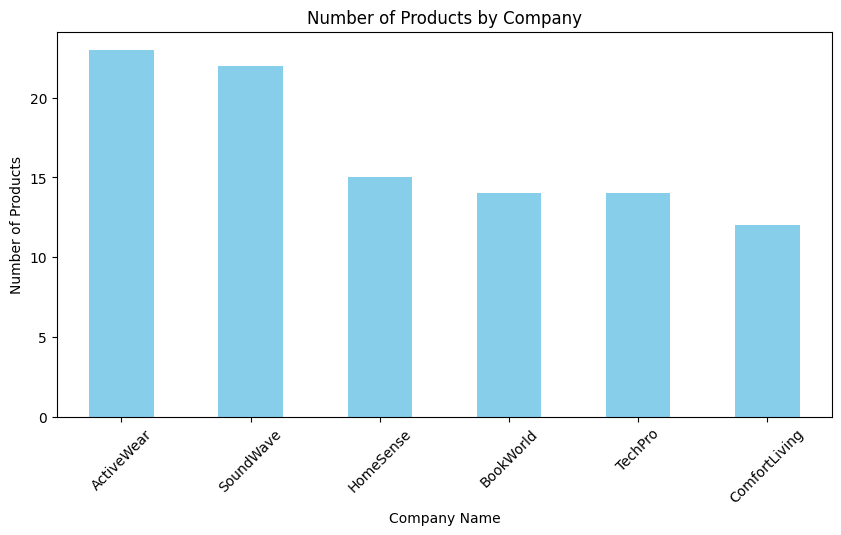

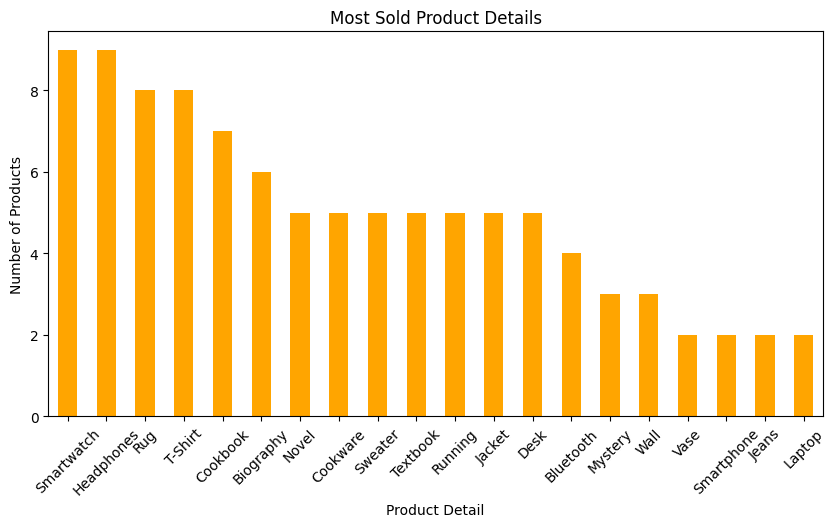

Total number of unique categories: 4


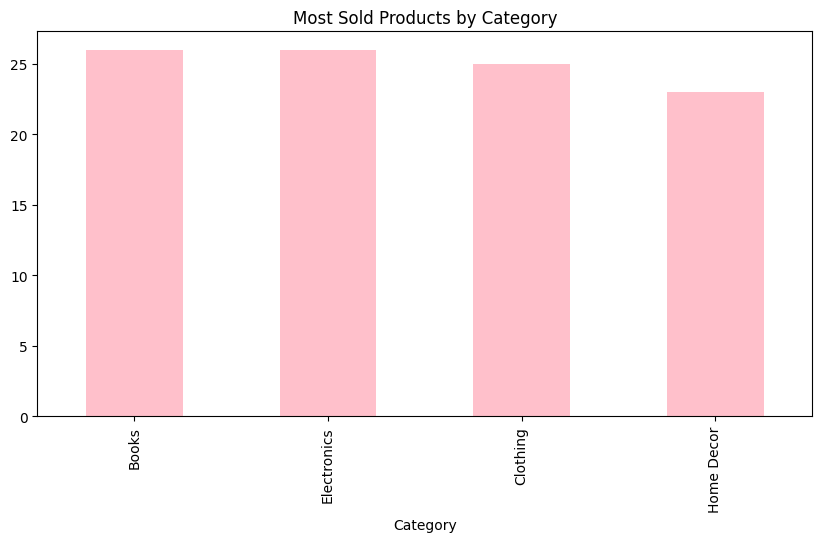

In [9]:
company_counts = products['CompanyName'].value_counts()
plt.figure(figsize=(10, 5))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Products by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

product_counts = products['ProductDetail'].value_counts()
plt.figure(figsize=(10, 5))
product_counts.plot(kind='bar', color='orange')
plt.title('Most Sold Product Details')
plt.xlabel('Product Detail')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

categories = products['Category'].nunique()
print(f"Total number of unique categories: {categories}")


type_prod_counts = products['Category'].value_counts()
plt.figure(figsize=(10,5))
type_prod_counts.plot(kind = 'bar',color = "Pink")
plt.title('Most Sold Products by Category')
plt.show()


#### Detailed Analysis of Transaction Dataset for Business Insights

In [11]:
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

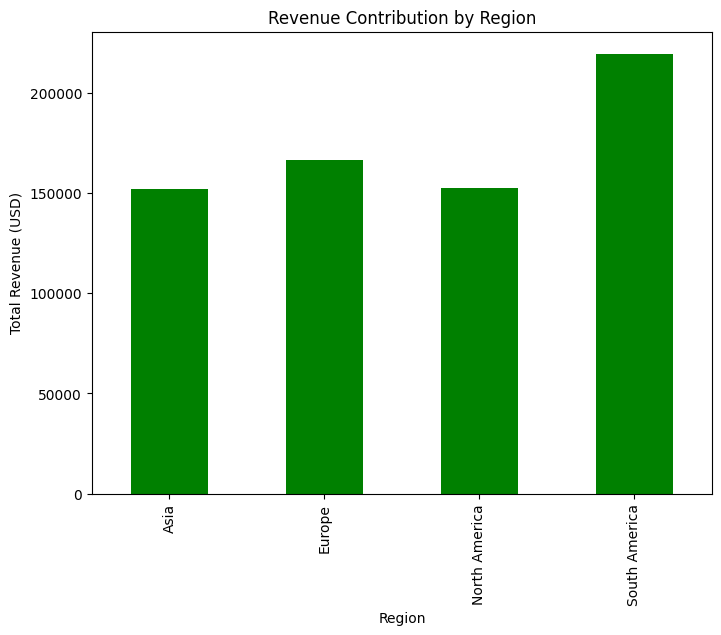

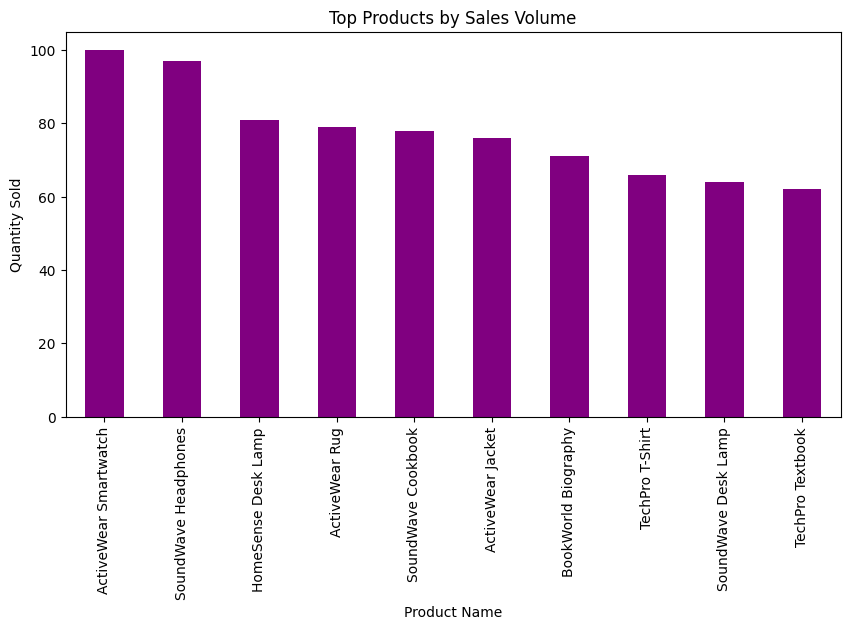

In [14]:
region_revenue = transactions.groupby('Region_y')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
region_revenue.plot(kind='bar', color='green')
plt.title('Revenue Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

top_products = transactions.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='purple')
plt.title('Top Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

#### Detailed Analysis of Customers Dataset for Business Insights

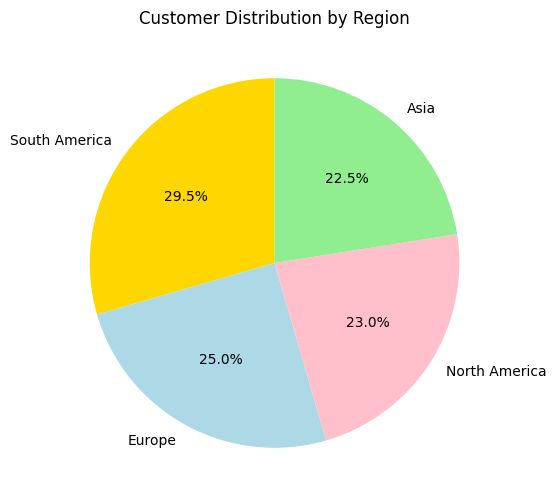

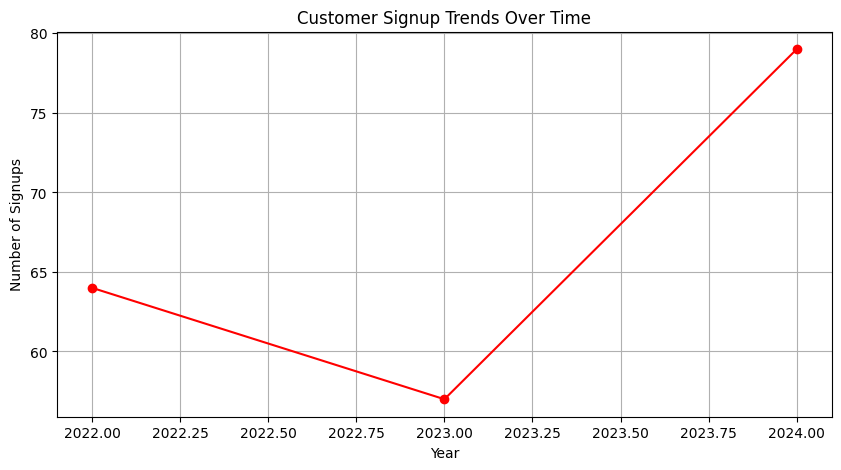

In [16]:
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(
    kind='pie',
    startangle=90,
    colors=['gold', 'lightblue', 'pink', 'lightgreen', 'orange'],
    autopct='%1.1f%%'

)
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.show()

customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='red')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


In [ ]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [ ]:
# Summary statistics for key metrics
summary_stats = merged_data.describe(include='all')

In [ ]:
# Aggregate data for insights
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
monthly_sales = merged_data.resample('M', on='TransactionDate')['TotalValue'].sum()


<ipython-input-13-cfee84cbd0b6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M', on='TransactionDate')['TotalValue'].sum()


## EDA VISUALIZATION

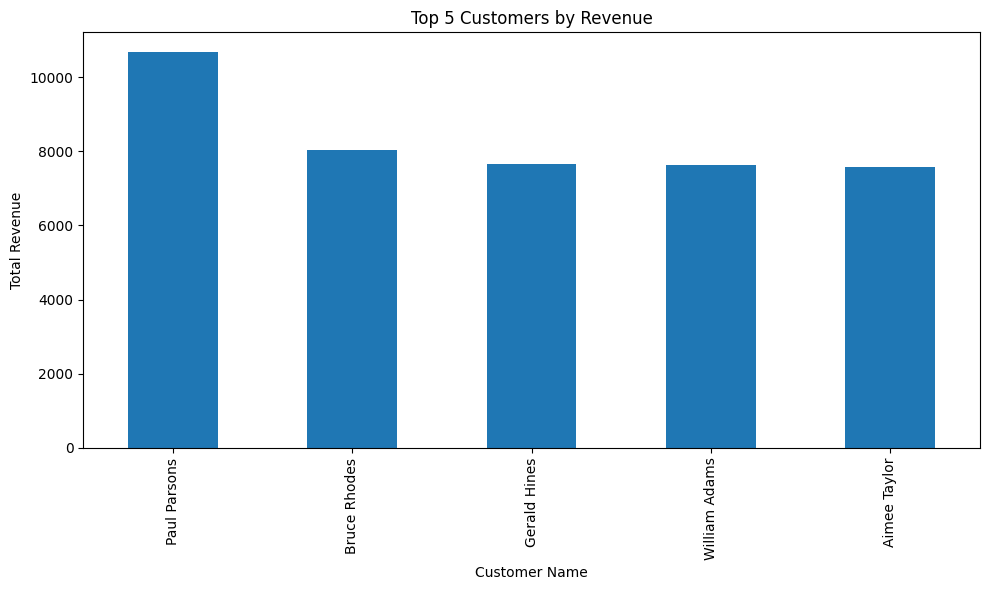

In [ ]:

# 1. Top 5 customers by revenue
top_customers.plot(kind='bar', figsize=(10, 6), title='Top 5 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

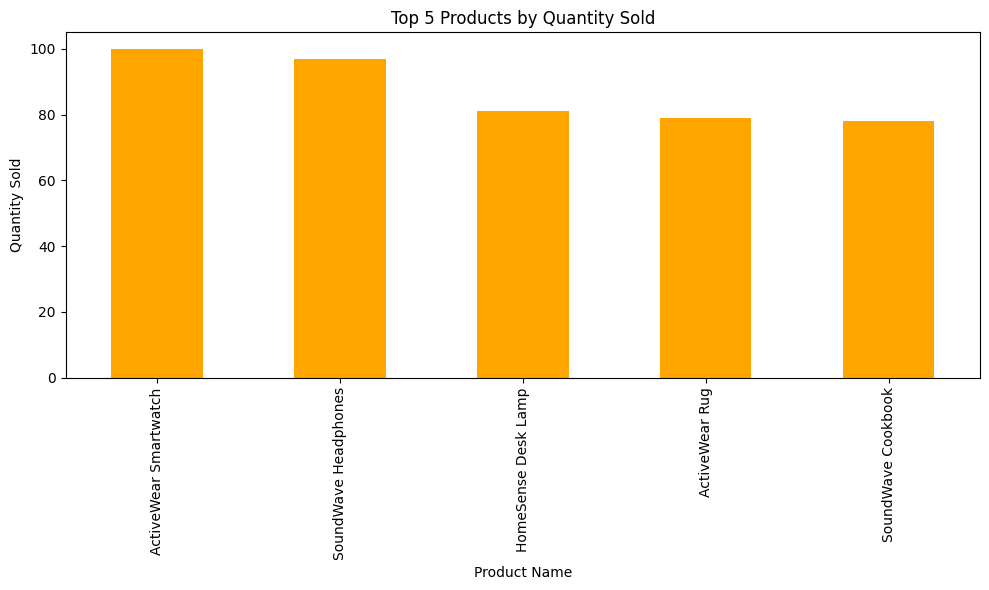

In [ ]:
# 2. Top 5 products by quantity sold
top_products.plot(kind='bar', figsize=(10, 6), color='orange', title='Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

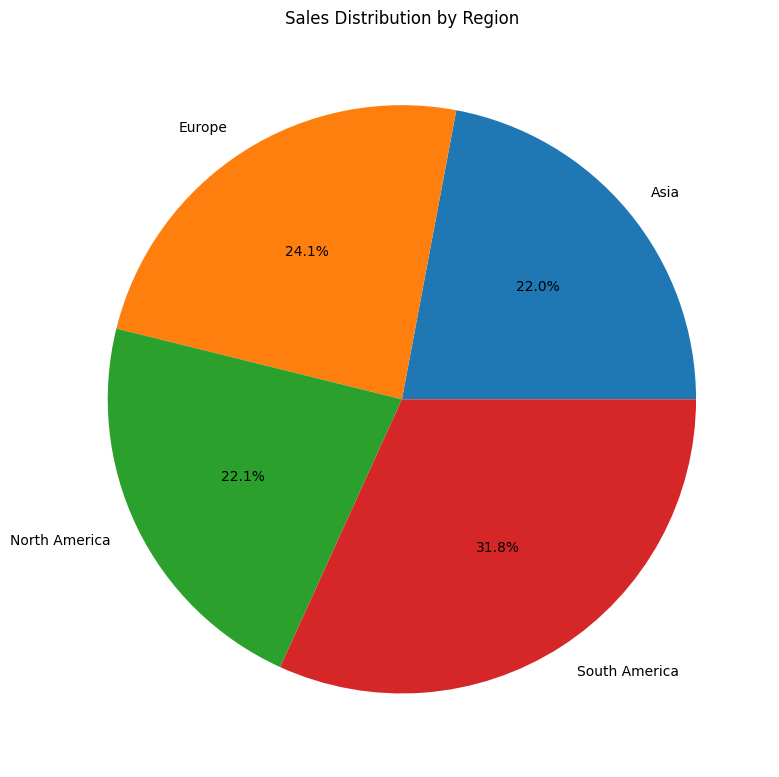

In [ ]:
# 3. Sales by region
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sales Distribution by Region')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()


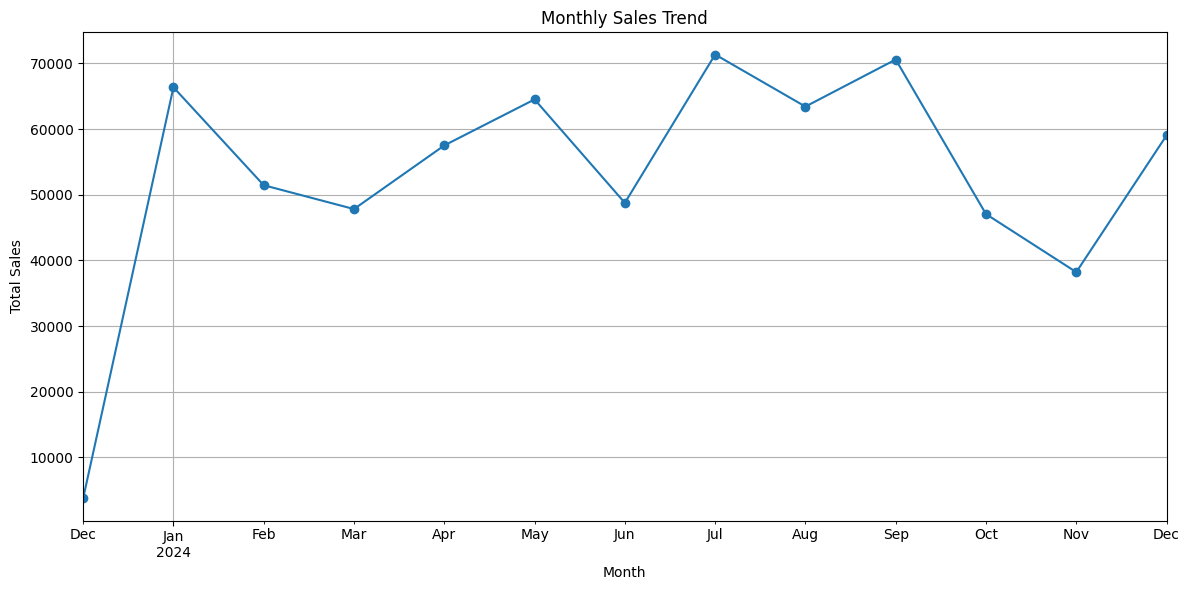

In [ ]:
# 4. Monthly sales trends
monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

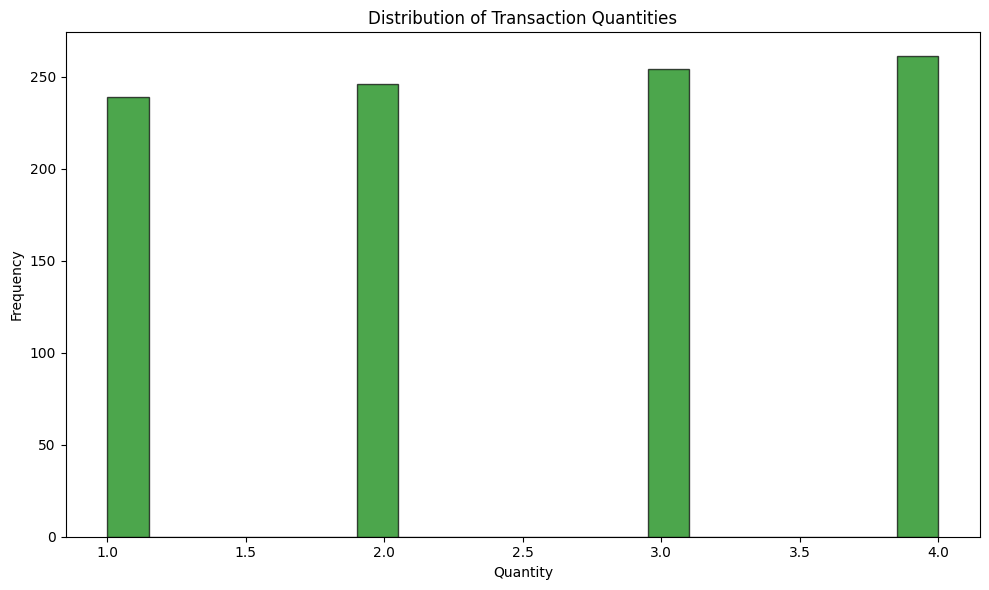

In [ ]:
# 5. Transaction quantity distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Quantity'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()